**Disciplina: Meteorologia Sinótica III**

**Professores:**

-Prof. Dr. Pedro Leite da Silva Dias

-Prof. Dr. Ricardo Hallak  

**Monitor:**

- Ronald Guiuseppi Ramírez Nina

# **IMERG LATE**

**Lista 1 - Índices ZCAS e LISAM**

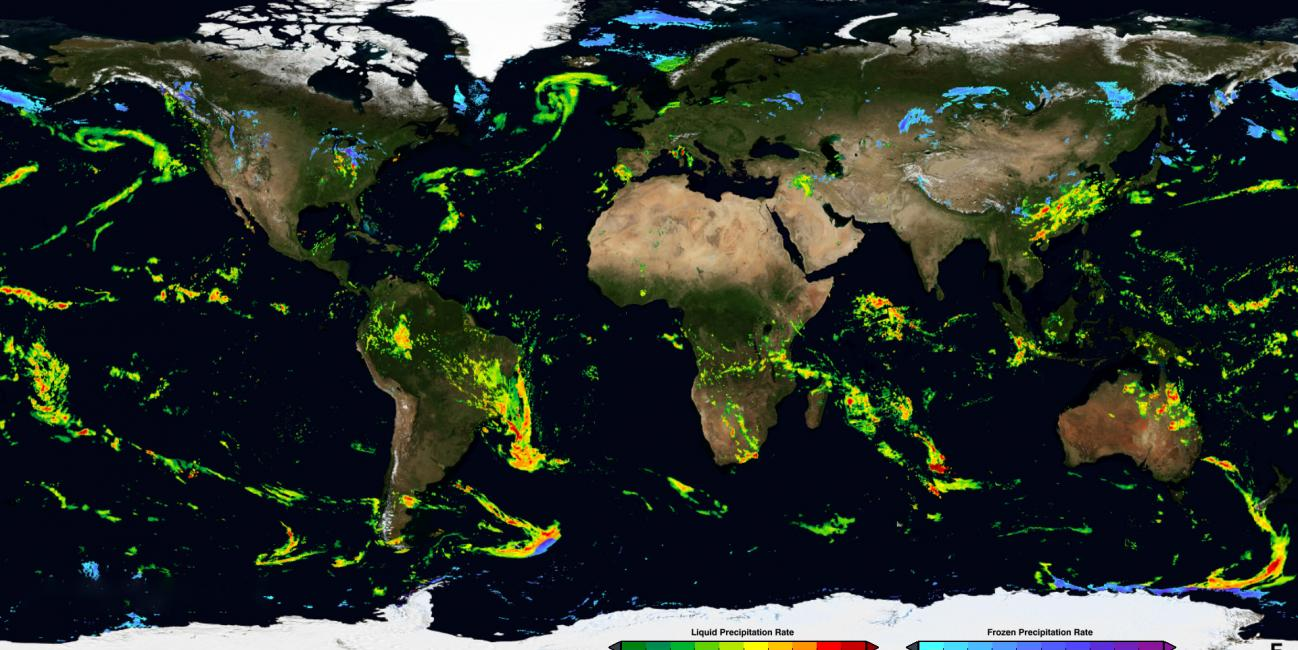

**1. Instalar pacotes para configurar mapas e barra de cores personalizadas**

In [2]:
!pip install cartopy
!pip install cmocean

**2. Importar livrarias para ler, escrever e processar arquivos NetCDF, e geração de figuras**

In [3]:
# Importar livrarias

# Livrarias para ler, escrever e processar dados
import numpy as np
import pandas as pd
import xarray as xr

# Livrarias para gerar figuras
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

# Importar o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3. Link de acesso aos dados do produto GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 degree V07**

- Link: [GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 degree V07](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDL_07/summary?keywords=%22IMERG%20late%22)

- Como citar os dados:

Huffman, G.J., E.F. Stocker, D.T. Bolvin, E.J. Nelkin, Jackson Tan (2024), GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 degree V07, Edited by Andrey Savtchenko, Greenbelt, MD, Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed: [Data Access Date], 10.5067/GPM/IMERGDL/DAY/07


**4. Ler arquivos NetCDF**

In [4]:
# Caminho do arquivo NetCDF
# É necessário salvar o arquivo NetCDF em uma pasta do seu drive personal para poder ser visualizado
path = '/content/drive/MyDrive/USP-CURSOS/MONITORIA/METEOROLOGIA-SINOTICA-III-2025/IMERG_LATE_January_to_March_2025.nc'

# Ler arquivo NetCDF
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 179MB
Dimensions:        (time: 80, lon: 800, lat: 701)
Coordinates:
  * lat            (lat) float64 6kB -60.05 -59.95 -59.85 ... 9.75 9.85 9.95
  * lon            (lon) float32 3kB -89.95 -89.85 -89.75 ... -10.15 -10.05
  * time           (time) datetime64[ns] 640B 2025-01-01 ... 2025-03-21
Data variables:
    precipitation  (time, lon, lat) float32 179MB ...
Attributes:
    BeginDate:       2025-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2025-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2025-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20250101-S000000-E002959.0000.V07...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/07
    ProductionTime:  2025-01-02T14:22:10.038Z
    history:         2025-03-22 18:09:41 GMT hyrax-1.17.1 https://gpm1.gesdis...
    history_json:    [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schem...

**5. Criar uma figura para uma data específica e configurar eixos de longitude, latitude, e barra de cores**

- Site da livraria cmocean para ver as opções de cores para as figuras

Link: [cmoncean](https://matplotlib.org/cmocean/)

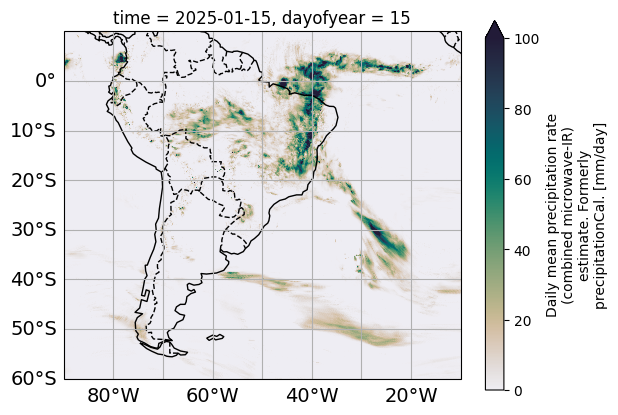

In [39]:
# Criar a figura e o eixo com projeção
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados
ds['precipitation'].sel(time='2025-01-15').plot(
    ax=ax,
    x='lon',
    y='lat',
    vmax=100,
    cmap=cmocean.cm.rain,
    transform=ccrs.PlateCarree())

# Adicionar feições geográficas
ax.coastlines()  # Adiciona linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')  # Fronteiras de países
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)  # Terra com cor cinza claro

# Agregando linhas da grade
gl = ax.gridlines(draw_labels = True)
# Removendo os labels da grade do lado superior
gl.top_labels = False
# Removendo os labels da grade do lado direito
gl.right_labels = False
# Estabelendo o size dos labels no eixo X
gl.xlabel_style = {'size': 14}
# Estabelecendo o size dos labels no eixo Y
gl.ylabel_style = {'size': 14}

# Mostrar o mapa
plt.show()

**6. Selecionar uma área específica**

In [6]:
ds_area1 = ds.sel(lat=slice(-30,10), lon=slice(-80,-20))
ds_area1

<xarray.Dataset> Size: 77MB
Dimensions:        (time: 80, lon: 600, lat: 400)
Coordinates:
  * lat            (lat) float64 3kB -29.95 -29.85 -29.75 ... 9.75 9.85 9.95
  * lon            (lon) float32 2kB -79.95 -79.85 -79.75 ... -20.15 -20.05
  * time           (time) datetime64[ns] 640B 2025-01-01 ... 2025-03-21
Data variables:
    precipitation  (time, lon, lat) float32 77MB ...
Attributes:
    BeginDate:       2025-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2025-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2025-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20250101-S000000-E002959.0000.V07...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/07
    ProductionTime:  2025-01-02T14:22:10.038Z
    history:         2025-03-22 18:09:41 GMT hyrax-1.17.1 https://gpm1.gesdis...
    history_json:    [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schem...

**7. Fazer uma figura da nova área selecionada**

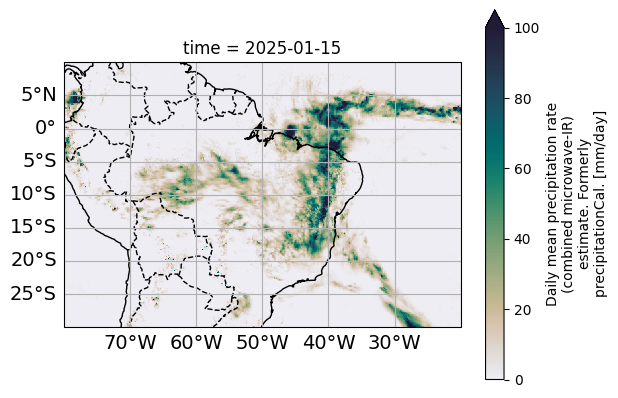

In [38]:
# Criar a figura e o eixo com projeção
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados
ds_area1['precipitation'].sel(time='2025-01-15').plot(
    ax=ax,
    x='lon',
    y='lat',
    vmax=100,
    cmap=cmocean.cm.rain,
    transform=ccrs.PlateCarree())

# Adicionar feições geográficas
ax.coastlines()  # Adiciona linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')  # Fronteiras de países
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)  # Terra com cor cinza claro

# Agregando linhas da grade
gl = ax.gridlines(draw_labels = True)
# Removendo os labels da grade do lado superior
gl.top_labels = False
# Removendo os labels da grade do lado direito
gl.right_labels = False
# Estabelendo o size dos labels no eixo X
gl.xlabel_style = {'size': 14}
# Estabelecendo o size dos labels no eixo Y
gl.ylabel_style = {'size': 14}

# Mostrar o mapa
plt.show()

**8. Fazer um cumulado de precipitação dos primeiros 5 dias (pentadas) desde 01-01-2025 até 05-01-2025**

In [8]:
ds_area1_mean = ds.sel(lat=slice(-30,10), lon=slice(-80,-20), time=slice('2025-01-01','2025-01-05')).sum(dim='time')
ds_area1_mean

<xarray.Dataset> Size: 966kB
Dimensions:        (lon: 600, lat: 400)
Coordinates:
  * lat            (lat) float64 3kB -29.95 -29.85 -29.75 ... 9.75 9.85 9.95
  * lon            (lon) float32 2kB -79.95 -79.85 -79.75 ... -20.15 -20.05
Data variables:
    precipitation  (lon, lat) float32 960kB 0.02 0.015 0.01 ... 0.07 0.18 0.24

**9. Fazer uma figura da pentada de precipitação do 01-01-2025 até 05-01-2025 para a área selecionada**

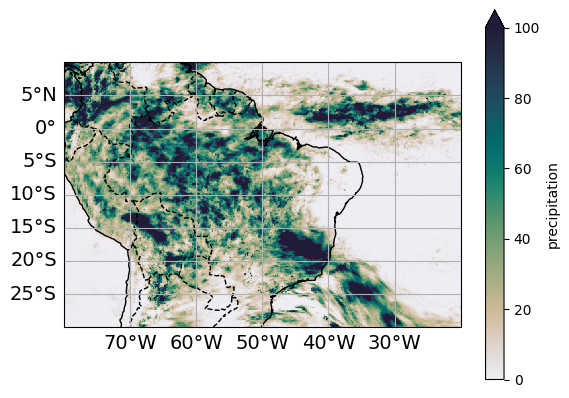

In [37]:
# Criar a figura e o eixo com projeção
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados
ds_area1_mean['precipitation'].plot(
    ax=ax,
    x='lon',
    y='lat',
    vmax=100,
    cmap=cmocean.cm.rain,
    transform=ccrs.PlateCarree())

# Adicionar feições geográficas
ax.coastlines()  # Adiciona linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')  # Fronteiras de países
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)  # Terra com cor cinza claro

# Agregando linhas da grade
gl = ax.gridlines(draw_labels = True)
# Removendo os labels da grade do lado superior
gl.top_labels = False
# Removendo os labels da grade do lado direito
gl.right_labels = False
# Estabelendo o size dos labels no eixo X
gl.xlabel_style = {'size': 14}
# Estabelecendo o size dos labels no eixo Y
gl.ylabel_style = {'size': 14}

# Mostrar o mapa
plt.show()

**10. Calcular pentadas de precipitação a partir do dataset original com dados desde o 01-01-2025 até 21-03-2025**

In [15]:
# Selecionar só as primeiras 16 pentadas = 80 primeiros dias do ano 2025
ds = ds.sel(time=slice('2025-01-01','2025-03-21'))

# Apagar os 29 de fevereiro se existir algum
# ------------------------------
# Remover os dias 29 de fevereiro
# ------------------------------
# Converte o tempo em um índice do Pandas
time_index = ds.time.to_index()
mask = ~((time_index.month == 2) & (time_index.day == 29))
ds_novo = ds.sel(time=mask)

# Contar o número de dias do novo dataset
n_dias = len(ds_novo.time)

# Verifique que o dataset não tem mais 29 de fevereiro
time_index = ds_novo.time.to_index()
assert not ((time_index.month == 2) & (time_index.day == 29)).any(), "Ainda existem dias 29 de fevereiro!"

# Total de anos (após remoção dos dias 29/02)
anos = np.unique(time_index.year)
n_anos = len(anos)

# Criar vetor dayofyear de 1 a 365 repetido para cada ano
dias_ano_padrao = np.tile(np.arange(1, n_dias + 1), n_anos)

# Adicionar como coordenada
ds_novo = ds_novo.assign_coords(dayofyear=("time", dias_ano_padrao))

# Calcular número da pentada fixa (1 a 73)
pentadas = ((ds_novo.dayofyear - 1) // 5 + 1)

ds_novo = ds_novo.assign_coords(pentada=("time", pentadas.data))
ds_novo

<xarray.Dataset> Size: 179MB
Dimensions:        (time: 80, lon: 800, lat: 701)
Coordinates:
  * lat            (lat) float64 6kB -60.05 -59.95 -59.85 ... 9.75 9.85 9.95
  * lon            (lon) float32 3kB -89.95 -89.85 -89.75 ... -10.15 -10.05
  * time           (time) datetime64[ns] 640B 2025-01-01 ... 2025-03-21
    dayofyear      (time) int64 640B 1 2 3 4 5 6 7 8 ... 73 74 75 76 77 78 79 80
    pentada        (time) int64 640B 1 1 1 1 1 2 2 2 ... 15 15 15 16 16 16 16 16
Data variables:
    precipitation  (time, lon, lat) float32 179MB ...
Attributes:
    BeginDate:       2025-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2025-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2025-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20250101-S000000-E002959.0000.V07...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/07
    ProductionTime:  2025-01-02T14:22:10.038Z
    history:         2025-03-22 18:09:41 GMT hyrax-1.17.1 https://gpm1.gesdis...
    history_json:    [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schem...

**10.1 - Criação do novo dataset com as pentadas**

In [16]:
ds_pentadas = ds_novo.groupby(["time.year", "pentada"]).sum(dim="time")
ds_pentadas

<xarray.Dataset> Size: 36MB
Dimensions:        (year: 1, pentada: 16, lon: 800, lat: 701)
Coordinates:
  * year           (year) int64 8B 2025
  * pentada        (pentada) int64 128B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lat            (lat) float64 6kB -60.05 -59.95 -59.85 ... 9.75 9.85 9.95
  * lon            (lon) float32 3kB -89.95 -89.85 -89.75 ... -10.15 -10.05
Data variables:
    precipitation  (lon, lat, year, pentada) float32 36MB 2.93 2.395 ... 5.28
Attributes:
    BeginDate:       2025-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2025-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2025-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20250101-S000000-E002959.0000.V07...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/07
    ProductionTime:  2025-01-02T14:22:10.038Z
    history:         2025-03-22 18:09:41 GMT hyrax-1.17.1 https://gpm1.gesdis...
    history_json:    [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schem...

**11. Fazer uma figura da primeira pentada de precipitação do 01-01-2025 até 05-01-2025 do novo dataset criado das pentadas**

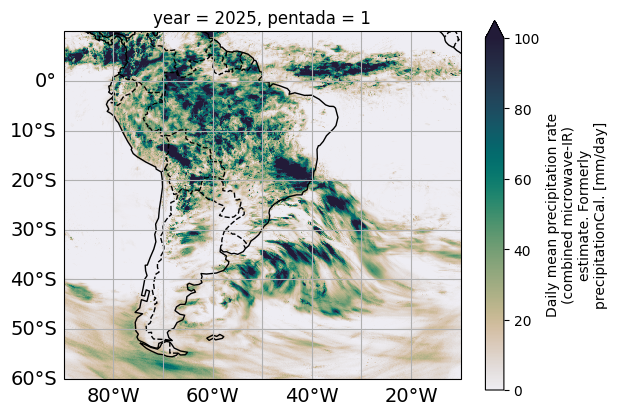

In [36]:
# Criar a figura e o eixo com projeção
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados
ds_pentadas['precipitation'].sel(pentada=1).plot(
    ax=ax,
    x='lon',
    y='lat',
    vmax=100,
    cmap=cmocean.cm.rain,
    transform=ccrs.PlateCarree())

# Adicionar feições geográficas
ax.coastlines()  # Adiciona linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')  # Fronteiras de países
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)  # Terra com cor cinza claro

# Agregando linhas da grade
gl = ax.gridlines(draw_labels = True)
# Removendo os labels da grade do lado superior
gl.top_labels = False
# Removendo os labels da grade do lado direito
gl.right_labels = False
# Estabelendo o size dos labels no eixo X
gl.xlabel_style = {'size': 14}
# Estabelecendo o size dos labels no eixo Y
gl.ylabel_style = {'size': 14}

# Mostrar o mapa
plt.show()

**12. Ler o arquivo NetCDF com a climatologia das pentadas**

In [19]:
# Ler arquivo da climatologia das pentadas
path_climatology_pentadas = '/content/drive/MyDrive/USP-CURSOS/MONITORIA/METEOROLOGIA-SINOTICA-III-2025/imerg_final_run_climatology_pentadas_2001-to-2020.nc'
ds_pentadas_climatology = xr.open_dataset(path_climatology_pentadas)
ds_pentadas_climatology

<xarray.Dataset> Size: 164MB
Dimensions:  (pentada: 73, lat: 701, lon: 800)
Coordinates:
  * pentada  (pentada) int64 584B 1 2 3 4 5 6 7 8 9 ... 66 67 68 69 70 71 72 73
  * lat      (lat) float64 6kB -60.05 -59.95 -59.85 -59.75 ... 9.75 9.85 9.95
  * lon      (lon) float64 6kB -89.95 -89.85 -89.75 ... -10.25 -10.15 -10.05
Data variables:
    prec     (lat, lon, pentada) float32 164MB ...

**13. Calcular anomalias das pentadas de precipitação**

**$Anomalia_{pentadas,2025} = Precipitação_{pentada,2025} - Média_{total-pentadas}$**

In [26]:
# Calcular anomalias das pentadas
anomalia_pentadas = ds_pentadas['precipitation'].sel(year=2025) - ds_pentadas_climatology['prec']
anomalia_pentadas

<xarray.DataArray (lon: 160, lat: 349, pentada: 16)> Size: 4MB
array([[[-1.30440521e+01, -1.35594912e+01, -9.84490395e+00, ...,
         -9.86527824e+00, -9.04689407e+00, -3.00554428e+01],
        [-1.25933743e+01, -1.41274834e+01, -1.04376097e+01, ...,
         -8.33063698e+00, -1.03503036e+01, -3.05785694e+01],
        [-1.29896212e+01, -1.41557083e+01, -1.08430262e+01, ...,
         -8.66283607e+00, -1.20539112e+01, -2.97467308e+01],
        ...,
        [ 5.16865692e+01, -1.28416151e-01, -3.05565029e-01, ...,
         -1.88517785e+00, -3.44235241e-01, -6.55571938e-01],
        [-8.72399807e-02, -4.18460459e-01, -2.76358187e-01, ...,
         -1.84726644e+00, -2.03460246e-01, -8.08218122e-01],
        [-3.91602218e-01, -2.01049447e-02, -3.43556046e-01, ...,
         -2.86142677e-01, -6.47688732e-02, -2.29363561e+00]],

       [[-1.30602770e+01, -1.48206015e+01, -9.68854237e+00, ...,
         -1.08545017e+01, -7.99131584e+00, -2.77541504e+01],
        [-1.29222651e+01, -1.53648176e+01, -1.00364513e+01, ...,
         -1.02150974e+01, -7.97187042e+00, -2.80198212e+01],
        [-1.33011446e+01, -1.54604721e+01, -1.04911098e+01, ...,
         -1.05534840e+01, -6.29173279e+00, -2.82813702e+01],
...
         -6.54868841e+00,  2.09397316e+01,  4.32662277e+01],
        [-7.55269885e-01,  7.63500929e-01,  1.50834477e+00, ...,
         -4.70206070e+00,  7.02691841e+00,  2.30637283e+01],
        [-3.20083290e-01, -5.92121363e-01,  2.57578343e-02, ...,
         -1.72212136e+00, -2.62193704e+00,  5.86377096e+00]],

       [[-6.42150116e+00, -1.72815380e+01,  5.47242832e+00, ...,
         -1.04371986e+01,  9.64890480e-01,  3.34466362e+00],
        [-9.98602009e+00, -1.78487282e+01,  6.44088840e+00, ...,
         -1.05737476e+01,  1.49994850e-01,  3.05199051e+00],
        [-1.00637045e+01, -1.77775955e+01,  7.04777336e+00, ...,
         -1.05882387e+01,  8.02379608e-01,  2.25112343e+00],
        ...,
        [-1.46582901e+00,  4.06032419e+00,  1.69882491e-01, ...,
         -9.21875477e+00,  1.56742992e+01,  2.61833286e+01],
        [-6.65064275e-01, -4.13082272e-01,  3.97071213e-01, ...,
         -7.87516022e+00, -2.58324718e+00,  1.74734497e+01],
        [-3.09679508e-01, -6.49309278e-01,  4.80192989e-01, ...,
         -1.56522465e+00,  8.40734482e-01, -2.68422556e+00]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 3kB -60.05 -59.95 -59.85 -59.75 ... 8.55 9.05 9.55
  * lon      (lon) float64 1kB -89.75 -89.25 -88.75 ... -11.25 -10.75 -10.25
  * pentada  (pentada) int64 128B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    year     int64 8B 2025

**14. Fazer um plot da anomalia das pentadas para uma data específica**

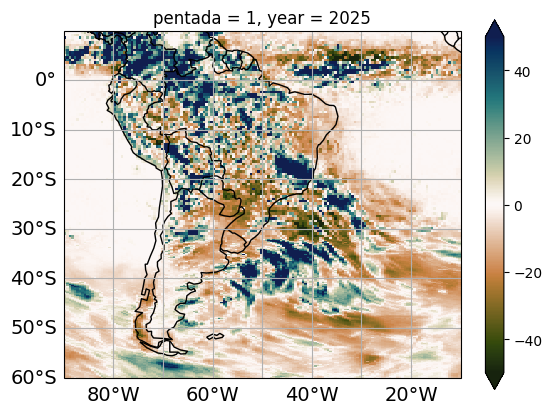

In [35]:
# Criar a figura e o eixo com projeção
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados
anomalia_pentadas.sel(pentada=1).plot(
    ax=ax,
    x='lon',
    y='lat',
    vmax=50,
    cmap=cmocean.cm.tarn,
    transform=ccrs.PlateCarree())

# Adicionar feições geográficas
ax.coastlines()  # Adiciona linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')  # Fronteiras de países
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)  # Terra com cor cinza claro

# Agregando linhas da grade
gl = ax.gridlines(draw_labels = True)
# Removendo os labels da grade do lado superior
gl.top_labels = False
# Removendo os labels da grade do lado direito
gl.right_labels = False
# Estabelendo o size dos labels no eixo X
gl.xlabel_style = {'size': 14}
# Estabelecendo o size dos labels no eixo Y
gl.ylabel_style = {'size': 14}

# Mostrar o mapa
plt.show()

**15. Fazer multiples plots das anomalias das pentadas para todo o período numa única figura**

<ipython-input-52-18f333f181b1>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores


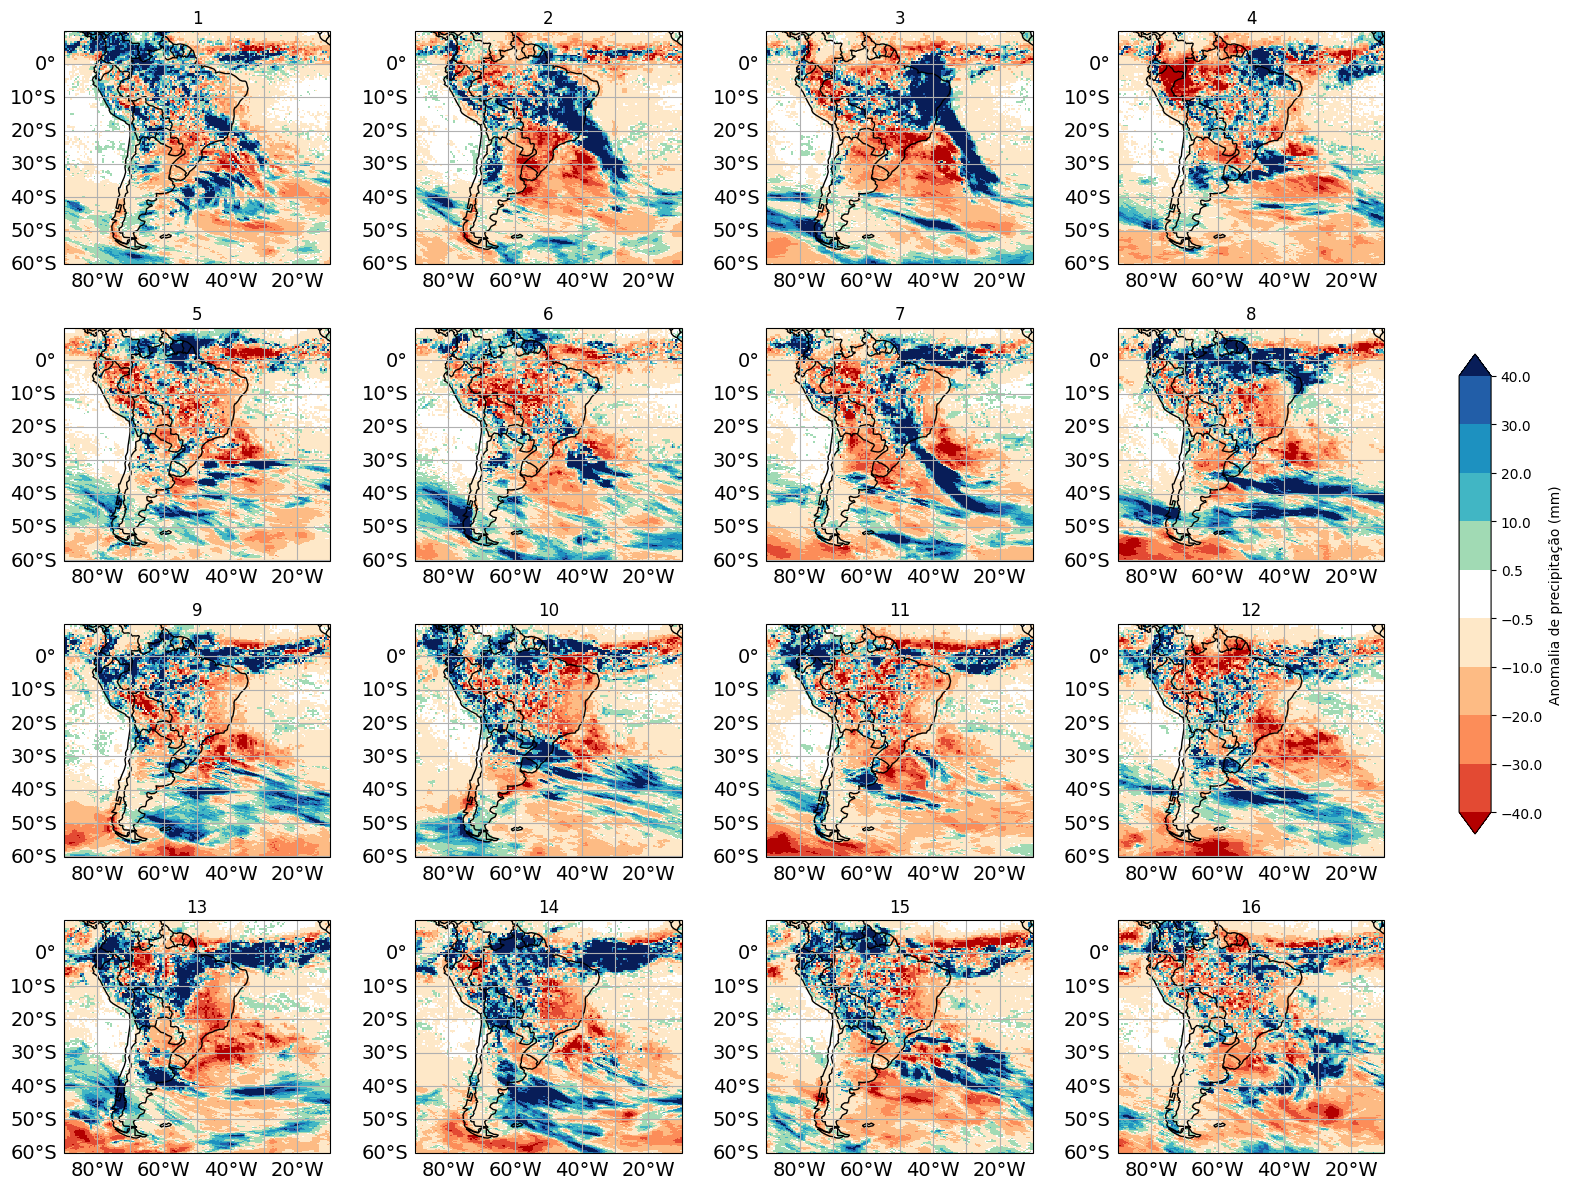

In [52]:
# Definir número de linhas e colunas para o grid de plots
n_rows = 4  # 4 linhas
n_cols = 4  # 4 colunas

# Criar a figura e os eixos para múltiplos mapas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar os tempos disponíveis
times = anomalia_pentadas['pentada'].values

# Variável para armazenar a última imagem plotada
im = None

from matplotlib.colors import BoundaryNorm, ListedColormap

# Níveis desejados
levels = [-40, -30, -20, -10, -0.5, 0.5, 10, 20, 30, 40]

# Criar 11 cores (1 a mais do que len(levels)-1) para lidar com 'extend="both"'
# Isso inclui cores para valores abaixo de -40 e acima de 40
colors = [
    '#081d58',  # para valores < -40
    '#225ea8',  # -40 a -30
    '#1d91c0',  # -30 a -20
    '#41b6c4',  # -20 a -10
    '#a1dab4',  # -10 a -0.5
    '#ffffff',  # -0.5 a 0.5 (cor branca)
    '#fee8c8',  # 0.5 a 10
    '#fdbb84',  # 10 a 20
    '#fc8d59',  # 20 a 30
    '#e34a33',  # 30 a 40
    '#b30000'   # > 40
]

# Criar o colormap e a normalização
cmap_custom = ListedColormap(colors)
norm = BoundaryNorm(boundaries=levels, ncolors=len(colors), extend='both')


# Loop para plotar cada pentada em um subplot
for i, ax in enumerate(axes.flat):  # Percorre todos os subplots
    if i < len(times):
        # Plotar os dados para a pentada correspondente e armazenar a última imagem
        im = anomalia_pentadas.sel(pentada=times[i]).plot(
            ax=ax,
            x='lon',
            y='lat',
            #vmax=50,
            #cmap=cmocean.cm.tarn,
            levels=levels,
            cmap=cmap_custom.reversed(),
            norm=norm,
            extend='both',
            transform=ccrs.PlateCarree(),
            add_colorbar=False  # Evita múltiplas barras de cor
        )

        # Adicionar feições geográficas
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)

        # Agregando linhas da grade
        gl = ax.gridlines(draw_labels = True)
        # Removendo os labels da grade do lado superior
        gl.top_labels = False
        # Removendo os labels da grade do lado direito
        gl.right_labels = False
        # Estabelendo o size dos labels no eixo X
        gl.xlabel_style = {'size': 14}
        # Estabelecendo o size dos labels no eixo Y
        gl.ylabel_style = {'size': 14}

        # Adicionar título com a data correspondente
        ax.set_title(str(times[i])[:10], fontsize=12)

    else:
        ax.set_visible(False)  # Esconder subplot vazio caso haja menos de 16 tempos

# Adicionar barra de cores comum à direita da figura usando a última imagem plotada
if im is not None:
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Posição da barra de cores
    plt.colorbar(im, cax=cbar_ax, label='Anomalia de precipitação (mm)')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores

# Mostrar os mapas
plt.show()

# **Plot da climatologia das pentadas [2001-2020]**

<ipython-input-47-3a0b6c24905d>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores


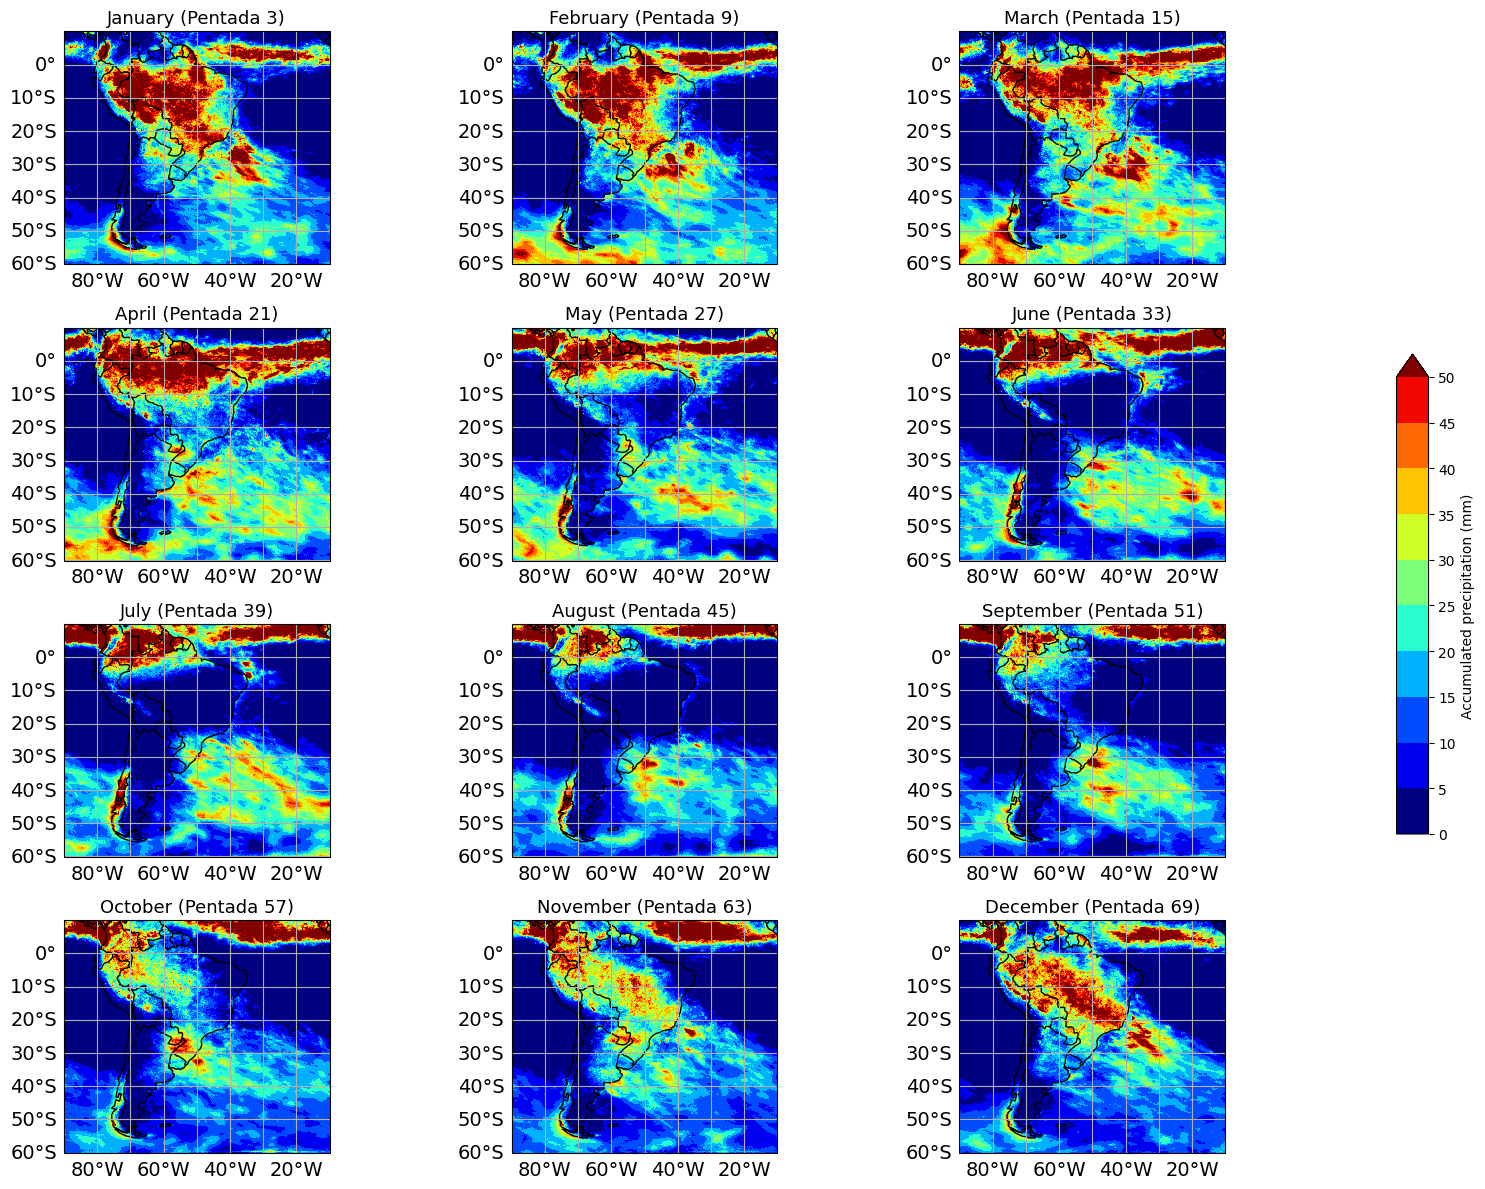

In [47]:
# Definir número de linhas e colunas para o grid de plots
n_rows = 4  # 4 linhas
n_cols = 3  # 4 colunas

# Pentadas representativas de cada mês
pentadas_por_mes = [3, 9, 15, 21, 27, 33, 39, 45, 51, 57, 63, 69]
# Titulo de cada painel
titulos_pentadas = ['January (Pentada 3)', 'February (Pentada 9)', 'March (Pentada 15)', 'April (Pentada 21)',
                    'May (Pentada 27)', 'June (Pentada 33)', 'July (Pentada 39)', 'August (Pentada 45)',
                    'September (Pentada 51)', 'October (Pentada 57)', 'November (Pentada 63)', 'December (Pentada 69)']

# Criar a figura e os eixos para múltiplos mapas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Variável para armazenar a última imagem plotada
im = None

# Titulo por mês
title = ['January [2001-2020]', 'February [2001-2020]', 'March [2001-2020]', 'April [2001-2020]', 'May [2001-2020]', 'June [2001-2020]',
         'July [2001-2020]', 'August [2001-2020]', 'September [2001-2020]', 'October [2001-2020]', 'November [2001-2020]', 'December [2001-2020]']

# Loop para plotar cada pentada em um subplot
for i, ax in enumerate(axes.flat):  # Percorre todos os subplots
    if i < len(pentadas_por_mes):

        pentada = pentadas_por_mes[i]
        # Plotar os dados para a pentada correspondente e armazenar a última imagem
        im = ds_pentadas_climatology['prec'].sel(pentada=pentada).plot(
            ax=ax,
            x='lon',
            y='lat',
            vmin=0,
            vmax=50,
            levels = np.arange(0,51,5),
            cmap='jet',#cmocean.cm.rain,
            transform=ccrs.PlateCarree(),
            add_colorbar=False)  # Evita múltiplas barras de cor

        # Adicionar feições geográficas
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)
        ax.add_feature(cfeature.LAKES, edgecolor='black')

        # Agregando linhas da grade
        gl = ax.gridlines(draw_labels = True)
        # Removendo os labels da grade do lado superior
        gl.top_labels = False
        # Removendo os labels da grade do lado direito
        gl.right_labels = False
        # Estabelendo o size dos labels no eixo X
        gl.xlabel_style = {'size': 14}
        # Estabelecendo o size dos labels no eixo Y
        gl.ylabel_style = {'size': 14}

        # Adicionar título com a data correspondente
        ax.set_title(titulos_pentadas[i], fontsize=13)

    else:
        ax.set_visible(False)  # Esconder subplot vazio caso haja menos de 16 tempos

# Adicionar barra de cores comum à direita da figura usando a última imagem plotada
if im is not None:
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Posição da barra de cores
    plt.colorbar(im, cax=cbar_ax, ticks=np.arange(0, 51, 5), label='Accumulated precipitation (mm)')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores

# Mostrar os mapas
plt.show()

# **Plot das climatologias mensais [2001-2020]**

<ipython-input-48-d40ec26bb293>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores


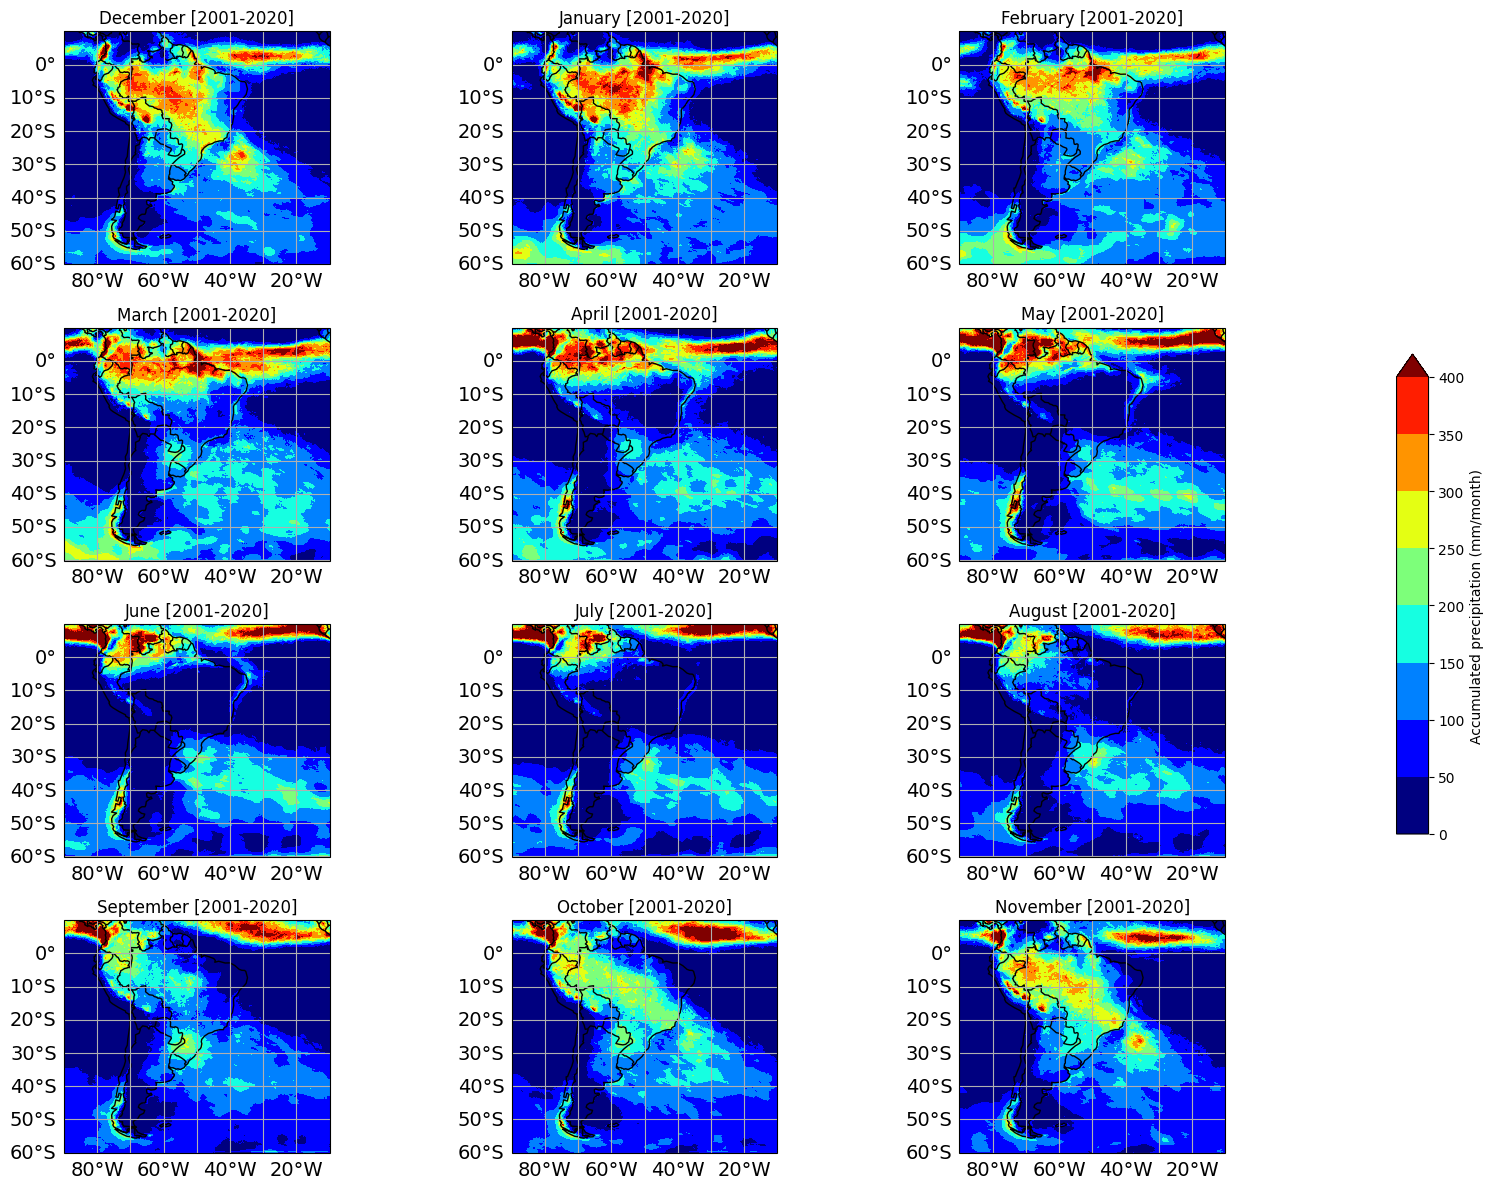

In [48]:
# Ler arquivo da climatologia mensal
path_climatologia_mensal = '/content/drive/MyDrive/USP-CURSOS/MONITORIA/METEOROLOGIA-SINOTICA-III-2025/imerg_final_run_montly_climatology_2001-to-2020.nc'
ds_clima = xr.open_dataset(path_climatologia_mensal)

# Definir número de linhas e colunas para o grid de plots
n_rows = 4  # 4 linhas
n_cols = 3  # 4 colunas

# Criar a figura e os eixos para múltiplos mapas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Selecionar os tempos disponíveis
times = ds_clima['month'].values

# Variável para armazenar a última imagem plotada
im = None

# Dias do mês
numero_dias_mes = [31,28,31,30,31,30,
         31,31,30,31,30,31]

# Titulo por mês
title = ['January [2001-2020]', 'February [2001-2020]', 'March [2001-2020]', 'April [2001-2020]', 'May [2001-2020]', 'June [2001-2020]',
         'July [2001-2020]', 'August [2001-2020]', 'September [2001-2020]', 'October [2001-2020]', 'November [2001-2020]', 'December [2001-2020]']

# Loop para plotar cada pentada em um subplot
for i, ax in enumerate(axes.flat):  # Percorre todos os subplots
    if i < len(times):
        # Plotar os dados para a pentada correspondente e armazenar a última imagem
        im = (ds_clima['prec'].sel(month=times[i]) * 24 * numero_dias_mes[i-1]).plot(
            ax=ax,
            x='lon',
            y='lat',
            vmin=0,
            vmax=400,
            levels = np.arange(0,401,50),
            cmap='jet',#cmocean.cm.rain,
            transform=ccrs.PlateCarree(),
            add_colorbar=False  # Evita múltiplas barras de cor
        )

        # Adicionar feições geográficas
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.5)
        ax.add_feature(cfeature.LAKES, edgecolor='black')

        # Agregando linhas da grade
        gl = ax.gridlines(draw_labels = True)
        # Removendo os labels da grade do lado superior
        gl.top_labels = False
        # Removendo os labels da grade do lado direito
        gl.right_labels = False
        # Estabelendo o size dos labels no eixo X
        gl.xlabel_style = {'size': 14}
        # Estabelecendo o size dos labels no eixo Y
        gl.ylabel_style = {'size': 14}

        # Adicionar título com a data correspondente
        ax.set_title(title[i-1], fontsize=12)

    else:
        ax.set_visible(False)  # Esconder subplot vazio caso haja menos de 16 tempos

# Adicionar barra de cores comum à direita da figura usando a última imagem plotada
if im is not None:
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Posição da barra de cores
    plt.colorbar(im, cax=cbar_ax, ticks=np.arange(0, 501, 50), label='Accumulated precipitation (mm/month)')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixar espaço para a barra de cores

# Mostrar os mapas
plt.show()